# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import weather_api_key
from citipy import citipy
import numpy as np
import scipy.stats as st


## Generate Cities List

In [2]:
latitude= []
cities =[]

lats = np.random.uniform(-90, 90, size=1500)
long = np.random.uniform(-180,180, size=13500)
latitude = zip(lats, long)

lats_n = []
long_n = []

for latlong in latitude:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name
    if city not in cities:
         cities.append(city)
         lats_n.append(latlong[0])
         long_n.append(latlong[1])

len(cities)
    




618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [4]:
lat = []
lng = []
temp = []
max_temp = []
hum = []
cloud = []
windspeed = []
country = []
date = []
cities_found = []

for city in cities:
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)
        print(f'Processing {city}')
    except: 
       print("Failed")
           




Failed
Processing mataura
Failed
Failed
Processing khatanga
Failed
Processing cape town
Processing ushuaia
Processing roald
Processing carnarvon
Processing jamestown
Processing playas
Processing bredasdorp
Processing rawson
Processing aykhal
Processing labytnangi
Processing filadelfia
Processing pevek
Processing qaanaaq
Processing port alfred
Failed
Processing rikitea
Processing norman wells
Processing bluff
Processing hithadhoo
Processing lensk
Processing longyearbyen
Processing markivka
Processing sioux lookout
Processing busselton
Processing porto novo
Processing buckeye
Processing punta arenas
Processing butaritari
Processing port pirie
Processing victoria
Processing fortuna
Processing griffith
Processing aswan
Processing esperance
Processing tasiilaq
Processing tuatapere
Processing staroutkinsk
Failed
Processing puyang
Processing hermanus
Processing yellowknife
Processing ucluelet
Processing bonthe
Processing chimore
Processing madera
Processing salinopolis
Processing new norfolk


In [5]:
print(len(cities))

618


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({'City': cities_found, 'Latitude': lat, 'Longitude': lng, 'Max Temp': max_temp, 'Humidity':hum,'Cloudiness':cloud, 'Wind Speed': windspeed, 'Country': country, 'Date': date})
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,11.93,98,10,0.38,NZ,1651046366
1,khatanga,71.9667,102.5000,-4.27,80,100,2.50,RU,1651046412
2,cape town,-33.9258,18.4232,19.39,63,0,2.06,ZA,1651046402
3,ushuaia,-54.8000,-68.3000,2.81,81,75,9.77,AR,1651046132
4,roald,62.5833,6.1333,5.74,56,75,1.03,NO,1651046468


In [7]:
city_df.count()

City          568
Latitude      568
Longitude     568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.613935,16.312099,17.164278,67.806338,61.829225,3.733504,1.651047e+09
std,33.505996,88.361825,11.846859,23.865315,40.247612,2.446774,2.101496e+02
min,-54.800000,-175.200000,-26.870000,1.000000,0.000000,0.000000,1.651046e+09
25%,-7.391650,-64.303200,8.672500,56.750000,19.500000,1.947500,1.651047e+09
50%,22.180350,22.345700,19.575000,73.000000,75.000000,3.250000,1.651047e+09
75%,48.214425,90.847150,25.615000,86.000000,100.000000,5.102500,1.651047e+09
max,78.218600,179.316700,44.510000,100.000000,100.000000,14.220000,1.651047e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_check = city_df['Humidity'].describe()
print("There are cities with Humidity > 100%")
city_check

There are cities with Humidity > 100%


count    568.000000
mean      67.806338
std       23.865315
min        1.000000
25%       56.750000
50%       73.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [39]:
city_df.to_csv("Weather_Data.csv", index=False)
city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,11.93,98,10,0.38,NZ,1651046366
1,khatanga,71.9667,102.5000,-4.27,80,100,2.50,RU,1651046412
2,cape town,-33.9258,18.4232,19.39,63,0,2.06,ZA,1651046402
3,ushuaia,-54.8000,-68.3000,2.81,81,75,9.77,AR,1651046132
4,roald,62.5833,6.1333,5.74,56,75,1.03,NO,1651046468
...,...,...,...,...,...,...,...,...,...
563,shelburne,44.0787,-80.2041,-0.69,85,100,5.86,CA,1651046965
564,tunceli,39.1083,39.5471,21.53,41,2,1.37,TR,1651046967
565,olenegorsk,68.1500,33.3000,-5.62,61,100,6.95,RU,1651046967
566,la ronge,55.1001,-105.2842,-2.58,84,97,4.96,CA,1651046430


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

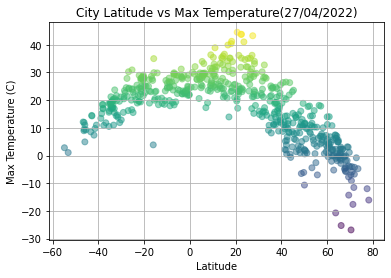

In [23]:
plt.scatter(city_df['Latitude'], city_df['Max Temp'], alpha= 0.5, c= city_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature(27/04/2022)')
plt.grid()
plt.savefig("Images/LatvsTemp.png")

## Latitude vs. Humidity Plot

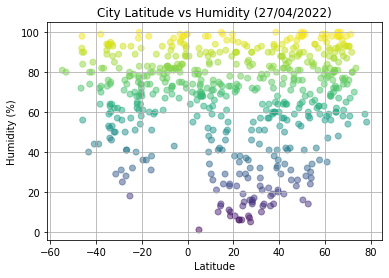

In [24]:
plt.scatter(city_df['Latitude'], city_df['Humidity'], alpha= 0.5, c= city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (27/04/2022)')
plt.grid()
plt.savefig("Images/LatvsHum.png")

## Latitude vs. Cloudiness Plot

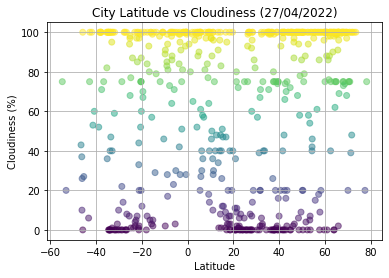

In [25]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], alpha= 0.5, c= city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (27/04/2022)')
plt.grid()
plt.savefig("Images/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

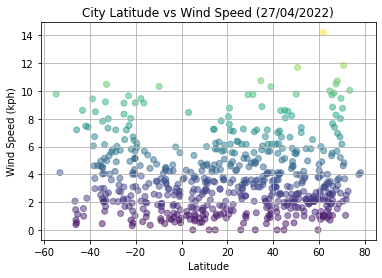

In [26]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], alpha= 0.5, c= city_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('City Latitude vs Wind Speed (27/04/2022)')
plt.grid()
plt.savefig("Images/LatvsWindspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-values is: -0.8535438588851184


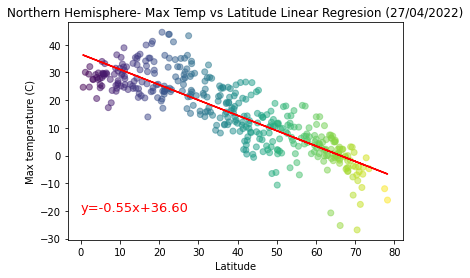

In [27]:
northern_cities = city_df.loc[city_df['Latitude']>0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(northern_cities["Latitude"], northern_cities["Max Temp"])
vc_fit = vc_slope * northern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(northern_cities['Latitude'], northern_cities['Max Temp'], alpha= 0.5, c= northern_cities['Latitude'])
plt.plot(northern_cities['Latitude'],vc_fit,color="red")
plt.text(0,-20,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Northern Hemisphere- Max Temp vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/NH-Maxtempvslatitud.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-values is: 0.6818271898723162


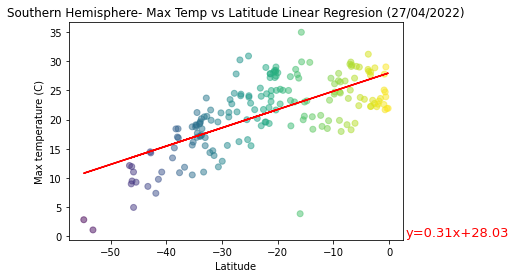

In [28]:
southern_cities = city_df.loc[city_df['Latitude']<0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(southern_cities["Latitude"], southern_cities["Max Temp"])
vc_fit = vc_slope * southern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(southern_cities['Latitude'],southern_cities['Max Temp'], alpha= 0.5, c= southern_cities['Latitude'])
plt.plot(southern_cities['Latitude'],vc_fit,color="red")
plt.text(3,0,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Southern Hemisphere- Max Temp vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/STH-Maxtempvslatitud.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-values is: 0.239187708765971


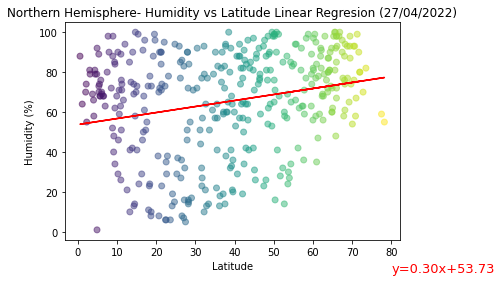

In [33]:
northern_cities = city_df.loc[city_df['Latitude']>0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(northern_cities["Latitude"], northern_cities["Humidity"])
vc_fit = vc_slope * northern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(northern_cities['Latitude'], northern_cities['Humidity'], alpha= 0.5, c= northern_cities['Latitude'])
plt.plot(northern_cities['Latitude'],vc_fit,color="red")
plt.text(80,-20,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere- Humidity vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/NH-Humidityvslatitud.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-values is: 0.22110644577111904


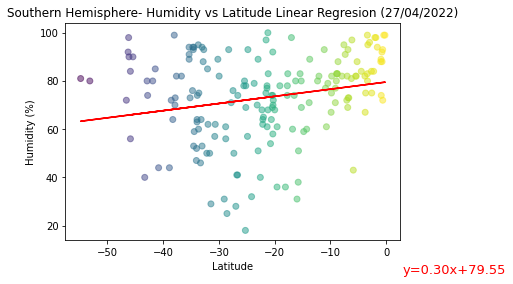

In [34]:
southern_cities = city_df.loc[city_df['Latitude']<0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(southern_cities["Latitude"], southern_cities["Humidity"])
vc_fit = vc_slope * southern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(southern_cities['Latitude'],southern_cities['Humidity'], alpha= 0.5, c= southern_cities['Latitude'])
plt.plot(southern_cities['Latitude'],vc_fit,color="red")
plt.text(3,0,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere- Humidity vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/STH-Humidityvslatitud.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-values is: 0.24133712716367295


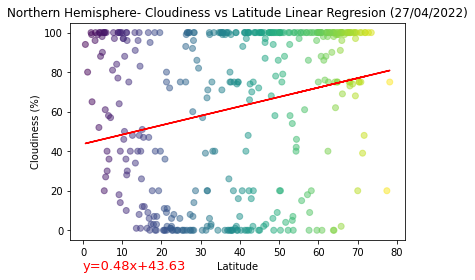

In [35]:
northern_cities = city_df.loc[city_df['Latitude']>0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(northern_cities["Latitude"], northern_cities["Cloudiness"])
vc_fit = vc_slope * northern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(northern_cities['Latitude'], northern_cities['Cloudiness'], alpha= 0.5, c= northern_cities['Latitude'])
plt.plot(northern_cities['Latitude'],vc_fit,color="red")
plt.text(0,-20,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere- Cloudiness vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/NH-Cloudinessvslatitud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-values is: 0.2565481848055635


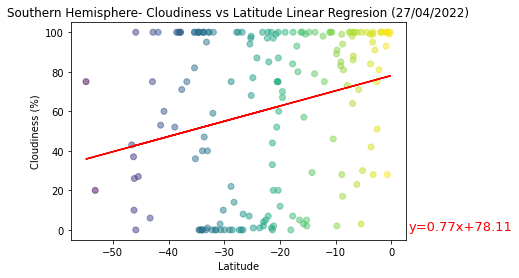

In [36]:
southern_cities = city_df.loc[city_df['Latitude']<0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(southern_cities["Latitude"], southern_cities["Cloudiness"])
vc_fit = vc_slope * southern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(southern_cities['Latitude'],southern_cities['Cloudiness'], alpha= 0.5, c= southern_cities['Latitude'])
plt.plot(southern_cities['Latitude'],vc_fit,color="red")
plt.text(3,0,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere- Cloudiness vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/STH-Cloudinessvslatitud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-values is: 0.12692015302341364


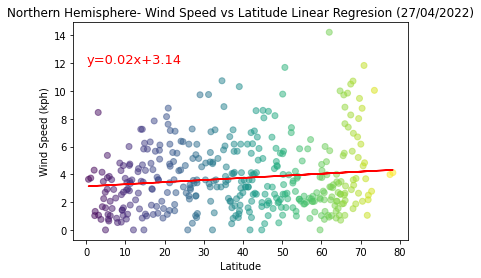

In [37]:
northern_cities = city_df.loc[city_df['Latitude']>0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(northern_cities["Latitude"], northern_cities["Wind Speed"])
vc_fit = vc_slope * northern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(northern_cities['Latitude'], northern_cities['Wind Speed'], alpha= 0.5, c= northern_cities['Latitude'])
plt.plot(northern_cities['Latitude'],vc_fit,color="red")
plt.text(0,12,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Northern Hemisphere- Wind Speed vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/NH-Wind speedvslatitud.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-values is: -0.26270286945338905


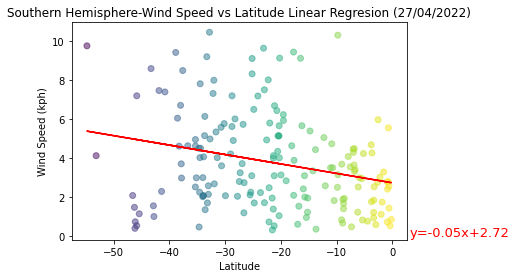

In [38]:
southern_cities = city_df.loc[city_df['Latitude']<0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(southern_cities["Latitude"], southern_cities["Wind Speed"])
vc_fit = vc_slope * southern_cities["Latitude"] + vc_int
vc_slope

plt.scatter(southern_cities['Latitude'],southern_cities['Wind Speed'], alpha= 0.5, c= southern_cities['Latitude'])
plt.plot(southern_cities['Latitude'],vc_fit,color="red")
plt.text(3,0,f"y={vc_slope:.2f}x+{vc_int:.2f}", {'color': 'red', 'fontsize': 13})
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Southern Hemisphere-Wind Speed vs Latitude Linear Regresion (27/04/2022)')
print(f'The r-values is: {vc_r}')
plt.savefig("Images/STH-WindSpeedvslatitud.png")

# Conclusions


City Latitude vs Max Temperature  we can observe that there is a correlation between Latitude and Max Temperature nevertheless this relation is not linear, we can see that those cities closer to the Equator have the highest temperature and as you get farther the temparture decrease. We also can notice there are more cities in the northern hemisphere despite the coordinates were randomly generated.

Talking about the relation between Cloudiness vs Latitude, in both hemispheres, we can see a positive linear relation meaning futher north the city is located more cloudy is.

Regarding wind speed vs latitude we found a negative relation in the southern hemisphere and positive realtion in the northern hemisphere that means the cities located closer to Equator become less windy. This effect is more notorious in the Southern Hemisphere.